# FPLCPlot (FPLC Chromatogram plotting tool)
*Interactive Jupyter notebok interface to FPLCPlot.*

An interactive Jupyter  notebook to plot chromatograms outputted from **GE Life Sciences / Amersham Biosciences UNICORN 5.X** software. To use this notebook, simply output an `.XLS` file from the UNICORN software, containing all curves / traces (i.e. UV absorbance, conductivity, Temperature, etc.). Save this file in the same directory as the `.ipynb` file for this notebook, and re-run the cells.

### Dependencies
- Python 2.7 or newer
- Matplotlib
- NumPy
- Pandas
- ipywidgets

In [1]:
%matplotlib inline
from chromatogram import plotTraces

### Importing Excel files in current directory
By default, all Excel files in the current directory are loaded into a Python list, which will be overlay plotted on the same figure. To exclude an Excel file, simply move the file temporarily to another directory.

In [5]:
file_list = !ls *.xls
file_list

['Protein A.xls', 'Protein B.xls']

To plot your figure, simply run the below cell to generate a series of iPython widgets as interface to FPLCPlot. Any changes made to the parameters on the plot are shown after pressing the `Run plotTraces` button.

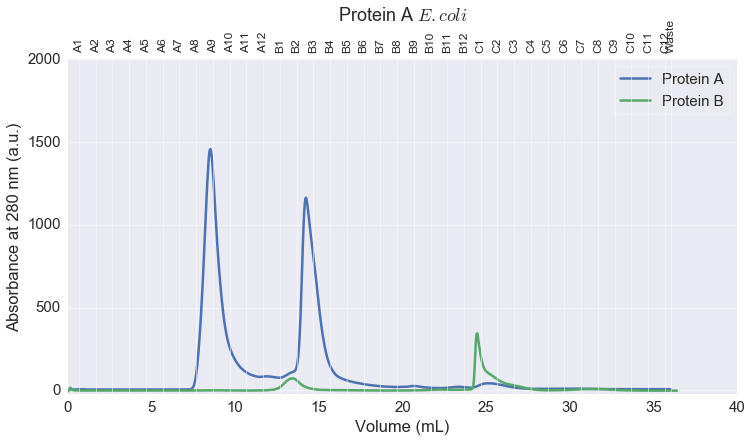

In [6]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from IPython.display import display

interact(plotTraces, file_list=fixed(file_list), 
         title=widgets.Text("Protein A $E. coli$", description='Title:'),
         output=widgets.Checkbox(value=False, description="Save file?"),
         f_format=widgets.Dropdown(options=['.png', '.pdf'], description='File format:'),
         y_lower=widgets.IntSlider(min=-200,max=100,step=10,value=-20, 
                                   description='Lower y-limit:'),
         y_upper=widgets.IntSlider(min=-10,max=4500,step=50,value=2000, 
                                   description='Upper y-limit:'),
         second_trace=widgets.ToggleButtons(options=['None','buffer_b', 
                                                     'conductivity'], 
                                            description='2nd trace:'), 
         __manual=True)